In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
import optuna
import shap
from Utils import *
from matplotlib.offsetbox import AnchoredText

In [2]:
data = pd.read_csv('../../data/poly_dataset_imputation.csv')
pre_data = polymer_data(data)
fp = pre_data.get_FP()
y_He = data['log10_He_Bayes'].to_numpy().reshape(-1, 1)
y_H2 = data['log10_H2_Bayes'].to_numpy().reshape(-1, 1)
y_N2 = data['log10_N2_Bayes'].to_numpy().reshape(-1, 1)
y_O2 = data['log10_O2_Bayes'].to_numpy().reshape(-1, 1)
y_CO2 = data['log10_CO2_Bayes'].to_numpy().reshape(-1, 1)
y_CH4 = data['log10_CH4_Bayes'].to_numpy().reshape(-1, 1)
feature_name = [str(ft) for ft in range(fp.shape[1])]
kernel = kernels.RBF() + kernels.WhiteKernel()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(fp, y_He, test_size=0.2, random_state=190)
# model_He = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=0, normalize_y=True, n_targets=1)
# model_He.fit(X_train, y_train)

# with open('../models/model_He.pkl', 'wb') as f:
#     pickle.dump(model_He, f)

with open('../models/model_He.pkl', 'rb') as f:
    model_He = pickle.load(f)

Permutation explainer: 489it [14:29:54, 106.96s/it]                           
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


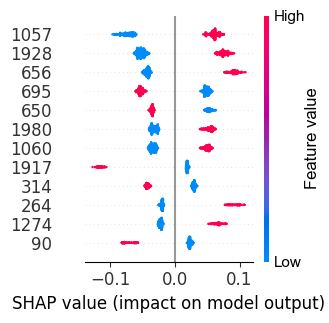

In [4]:
sample = X_train
explainer = shap.Explainer(model_He.predict, sample)
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, features=sample, feature_names=feature_name, plot_type='dot', max_display=12, plot_size=(3.33, 3.33))

In [5]:
sum_smi = data['SMILES'].dropna().drop_duplicates()
important_fpbit_list = [1057,1928,656,695,650,1980,1060,1917,314,264,1274,90]

In [8]:
path = '../models/He/'
for bit in important_fpbit_list:
    for smi in sum_smi:
        mol = Chem.MolFromSmiles(smi)
        bitInfo = {}
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048, bitInfo = bitInfo)
        if bit in bitInfo.keys():
            fig = Draw.DrawMorganBit(mol, bit, bitInfo)
            fig.save(path+'png/'+str(bit)+'.png', format='png')
            svg = Draw.DrawMorganBit(mol, bit, bitInfo, useSVG=True)
            svg_str = svg.data
            with open(path+'svg/' + str(bit) + '.svg', 'w') as f:
                f.write(svg_str)

In [7]:
# sample = X_train[:12]
# explainer = shap.Explainer(model_He.predict, sample)
# shap_values = explainer.shap_values(sample)
# shap.summary_plot(shap_values, features=sample, feature_names=feature_name, plot_type='dot', max_display=12, plot_size=(3.33, 3.33))